In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


### import library

In [11]:
agsel = pd.read_csv("car_resale_prices.csv")

baca data csv

In [12]:
agsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


menampilkan info dari dataset

In [13]:
hot_agsel = OneHotEncoder(sparse=False)
encoded_agsel = hot_agsel.fit_transform(agsel[['transmission_type']])

c:\Users\AGSEL FALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


onehot encode pertama untuk mengubah tipe data

In [14]:
encoded_agsel = pd.DataFrame(encoded_agsel)
agsel['Manual'] = encoded_agsel [0]
agsel['Automatic'] = encoded_agsel [1]

agsel.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,Manual,Automatic
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,0.0,1.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,1.0,0.0
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,0.0,1.0
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,0.0,1.0
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,0.0,1.0


onehot encode kedua untuk encode dua kolom automatic dan manual

In [15]:
agsel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
 15  Manual             17446 non-null  float64
 16  Automatic          174

menampilkan data yang sudah di encode

In [16]:
agsel.drop(columns=['full_name','resale_price', 'registered_year', 'engine_capacity', 'insurance', 'transmission_type', 'kms_driven', 'owner_type', 'fuel_type', 'max_power',  'mileage', 'body_type', 'city' ], inplace=True)

menghapus kolom yang bertipe object

In [17]:
agsel.head()

,Unnamed: 0,seats,Manual,Automatic
0,0,5.0,0.0,1.0
1,1,7.0,1.0,0.0
2,2,5.0,0.0,1.0
3,3,5.0,0.0,1.0
4,4,5.0,0.0,1.0


menampilkan data setelah data object dihapus

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ["seats"]
agsel_categorical = encoder.fit_transform(agsel[categorical_cols])
categorical_names = encoder.get_feature_names_out(categorical_cols)
agsel_categorical = pd.DataFrame(agsel_categorical, columns=categorical_names)

agsel_categorical.head()

,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,seats_nan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


encode kolom seats 

In [19]:
agsel = pd.concat([agsel, agsel_categorical], axis=1)
agsel.head()

,Unnamed: 0,seats,Manual,Automatic,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,seats_nan
0,0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


menggabungkan dataset setelah encode dan sebelum encode

In [21]:
X = agsel[['seats_6.0','seats_9.0']] 
y = agsel['Automatic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

melatih x dan y

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

menggunakan metode regresi

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalisasi menggunakan standar scaler

In [24]:
model = Sequential()

membuat model sequential

In [25]:
model.add(layers.Dense(8, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

mengcompile model

In [26]:
model.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/25


873/873 [==============================] - 7s 6ms/step - loss: 0.2079 - accuracy: 0.7154 - val_loss: 0.2059 - val_accuracy: 0.7117
Epoch 2/25
873/873 [==============================] - 3s 4ms/step - loss: 0.2012 - accuracy: 0.7206 - val_loss: 0.2057 - val_accuracy: 0.7117
Epoch 3/25
873/873 [==============================] - 2s 2ms/step - loss: 0.2012 - accuracy: 0.7201 - val_loss: 0.2056 - val_accuracy: 0.7117
Epoch 4/25
873/873 [==============================] - 2s 2ms/step - loss: 0.2012 - accuracy: 0.7203 - val_loss: 0.2051 - val_accuracy: 0.7117
Epoch 5/25
873/873 [==============================] - 2s 2ms/step - loss: 0.2011 - accuracy: 0.7206 - val_loss: 0.2059 - val_accuracy: 0.7063
Epoch 6/25
873/873 [==============================] - 2s 2ms/step - loss: 0.2012 - accuracy: 0.7200 - val_loss: 0.2054 - val_accuracy: 0.7117
Epoch 7/25
873/873 [==============================] - 2s 2ms/step - loss: 0.2012 - accuracy: 0.7204 - val_loss: 0.2053 - val_accuracy: 0.7117
Epoch 8/25
873/87

In [28]:
if isinstance(y_test.iloc[0], (int, float)):  
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("R-squared Score:", r2)
else:  
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int) 
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

110/110 [==============================] - 0s 2ms/step
R-squared Score: -0.0009185493271688383


evaluasi dengan r2 score

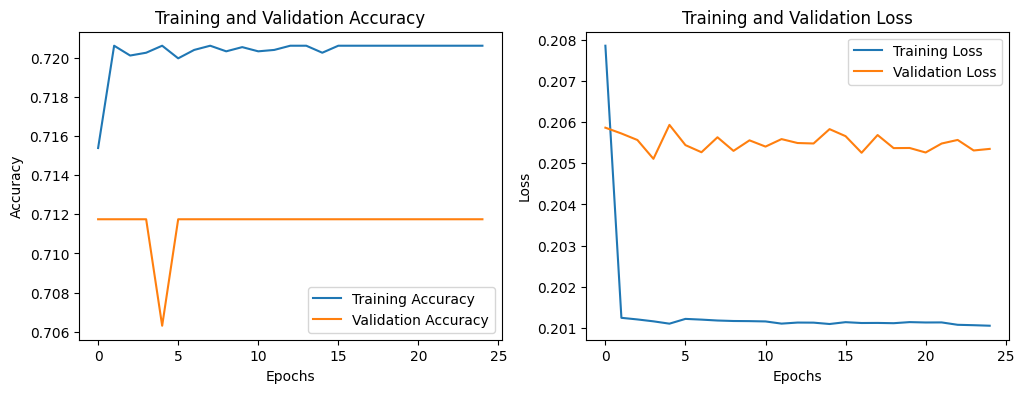

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

menampilkan grafik error(MAE) dan loss